In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("../input/flight-take-off-data-jfk-airport/M1_final.csv")
df.head()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [3]:
df=df.drop("TAIL_NUM",axis=1)

In [4]:
# Select numerical columns
#numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# Select categorical columns 
#cat_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

#my_cols = cat_cols + numerical_cols

#df= X[my_cols].copy()
#df.head()

In [5]:
# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['OP_UNIQUE_CARRIER', 'DEST', 'Dew Point', 'Wind', 'Condition']


# label encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
# Make copy to avoid changing original data 
label_df = df.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    label_df[col] = label_encoder.fit_transform(df[col])
    

label_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,3,10,-1,124,636,324,323,...,30,58,15,25,38,29.86,4,9,17,14
1,11,1,5,3,28,-7,371,2475,340,333,...,30,58,15,25,38,29.86,4,9,17,15
2,11,1,5,3,20,40,181,1069,301,341,...,30,58,15,25,38,29.86,4,9,17,22
3,11,1,5,3,30,-2,168,944,345,343,...,30,58,15,25,38,29.86,4,9,17,12
4,11,1,5,4,1,-4,139,760,360,356,...,28,58,15,24,35,29.91,4,9,17,13


In [7]:
y=label_df.TAXI_OUT
X=label_df.drop(['TAXI_OUT'], axis =1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(19309, 21) (9511, 21) (19309,) (9511,)


# 1. Linear Regression with Label Encoding

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
pred=linear_model.predict(X_test)
mse1=mean_squared_error(y_test,pred)**0.5
print(mse1)

6.552141905428975


# 2. Ridge Regression with Label Encoding

In [9]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=0.05, normalize=True)
ridge_reg.fit(X_train,y_train)
pred1=ridge_reg.predict(X_test)
mse2=mean_squared_error(y_test,pred1)**0.5
print(mse2)

6.557043371122483


# 3. Lasso Regression with Label Encoding

In [10]:
from sklearn.linear_model import Lasso
las_reg=Lasso(alpha=1,max_iter=1000,tol=.01)
las_reg.fit(X_train,y_train)
pred2=las_reg.predict(X_test)
mse3=mean_squared_error(y_test,pred2)**0.5
print(mse3)

6.6051775024757315


# 4. KNN Regression with Label Encoding

In [11]:
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor(n_neighbors=200)
knnr.fit(X_train,y_train)
pred3=knnr.predict(X_test)
mse4=mean_squared_error(y_test,pred3)**0.5
print(mse4)

6.6545484856439945


# 5. Support Vector Regression with Label Encoding

In [12]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
sc2=StandardScaler()
x1=X_train.copy()
x2=X_test.copy()
x1=sc1.fit_transform(x1)
x2=sc2.fit_transform(x2)
svr=SVR()
svr.fit(x1,y_train)
pred4=svr.predict(x2)
mse5=mean_squared_error(y_test,pred4)**0.5
print(mse5)

6.341401156519218


# 6. Random Forest with Label Encoding

In [13]:
from sklearn.ensemble import RandomForestRegressor
rand=RandomForestRegressor()
rand.fit(X_train,y_train)
pred5=rand.predict(X_test)
mse6=mean_squared_error(y_test,pred5)**0.5
print(mse6)

5.750369783266689


# 7. Light GBM model with Label Encoding

In [14]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()
lgbm.fit(X_train,y_train)
pred6=lgbm.predict(X_test)
mse7=mean_squared_error(y_test,pred6)**0.5
print(mse7)

5.785386289508172


# 8. Naive Bayes (Bayesian Ridge) with Label Encoding

In [15]:
from sklearn.linear_model import BayesianRidge
bayreg=BayesianRidge()
bayreg.fit(X_train,y_train)
pred7=bayreg.predict(X_test)
mse8=mean_squared_error(y_test,pred7)**0.5
print(mse8)

6.555802394732753


# one-hot encoding

In [16]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_df = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))


# One-hot encoding removed index; put it back
OH_cols_df.index = df.index

# Remove categorical columns (will replace with one-hot encoding)
num_df = df.drop(object_cols, axis=1)


# Add one-hot encoded columns to numerical features
OH_df = pd.concat([num_df, OH_cols_df], axis=1)

OH_df.head()
y=OH_df.TAXI_OUT
X=OH_df.drop(['TAXI_OUT'], axis =1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

# 1. Linear Regression with One Hot Encoding

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lreg=LinearRegression()
lreg.fit(X_train,y_train)
pred=lreg.predict(X_test)
mse_1=mean_squared_error(y_test,pred)**0.5
print(mse_1)

6.278996227300192


# 2. Ridge Regression with One Hot Encoding

In [19]:
from sklearn.linear_model import Ridge
ridgereg=Ridge(alpha=0.05, normalize=True)
ridgereg.fit(X_train,y_train)
pred1=ridgereg.predict(X_test)
mse_2=mean_squared_error(y_test,pred1)**0.5
print(mse_2)

6.274927815995527


# 3. Lasso Regression with One Hot Encoding

In [20]:
from sklearn.linear_model import Lasso
lasreg=Lasso(alpha=0.05, normalize=True)
lasreg.fit(X_train,y_train)
pred2=lasreg.predict(X_test)
mse_3=mean_squared_error(y_test,pred2)**0.5
print(mse_3)

6.840950274381113


# 4. KNN regression with One Hot Encoding

In [21]:
from sklearn.neighbors import KNeighborsRegressor
knnr=KNeighborsRegressor(n_neighbors=200)
knnr.fit(X_train,y_train)
pred3=knnr.predict(X_test)
mse_4=mean_squared_error(y_test,pred3)**0.5
print(mse_4)

6.65972525456585


# 5. Support Vector Regression with One Hot Encoding

In [22]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
sc2=StandardScaler()
x1=X_train.copy()
x2=X_test.copy()
x1=sc1.fit_transform(x1)
x2=sc2.fit_transform(x2)
svr=SVR()
svr.fit(x1,y_train)
pred4=svr.predict(x2)
mse_5=mean_squared_error(y_test,pred4)**0.5
print(mse_5)

6.295220750860302


# 6. Random Forest Regression with One Hot Encoding

In [23]:
from sklearn.ensemble import RandomForestRegressor
rand=RandomForestRegressor()
rand.fit(X_train,y_train)
pred5=rand.predict(X_test)
mse_6=mean_squared_error(y_test,pred5)**0.5
print(mse_6)

5.714726442948722


# 7. Light GBM model with One Hot Encoding

In [24]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()
lgbm.fit(X_train,y_train)
pred6=lgbm.predict(X_test)
mse_7=mean_squared_error(y_test,pred6)**0.5
print(mse_7)

5.788277519783179


# 8. Naive Bayes (Bayesian Ridge) with One Hot Encoding

In [25]:
from sklearn.linear_model import BayesianRidge
bayreg=BayesianRidge()
bayreg.fit(X_train,y_train)
pred7=bayreg.predict(X_test)
mse_8=mean_squared_error(y_test,pred7)**0.5
print(mse_8)

6.28311748855992


#comparison 

<function matplotlib.pyplot.show(close=None, block=None)>

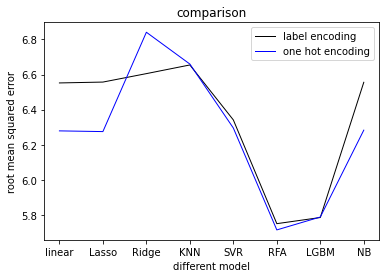

In [26]:
import numpy as np
RMSE1=np.array([mse1,mse2,mse3,mse4,mse5,mse6,mse7,mse8])
RMSE2=np.array([mse_1,mse_2,mse_3,mse_4,mse_5,mse_6,mse_7,mse_8])

from matplotlib import pyplot as plt

plt.plot(["linear","Lasso","Ridge","KNN","SVR","RFA","LGBM","NB"],RMSE1,"k",label="label encoding",linewidth=1)
plt.plot(["linear","Lasso","Ridge","KNN","SVR","RFA","LGBM","NB"],RMSE2,"b",label="one hot encoding",linewidth=1)

plt.title("comparison")
plt.xlabel("different model")
plt.ylabel("root mean squared error")
plt.legend() 

plt.show